# Analisando a distribuição dos votos das coligações formadas entre os partidos

Coligações:
 - FEDERACAO PSOL REDE: PSOL/REDE
 - FEDERACAO BRASIL DA ESPERANCA - FE BRASIL: PT/PC DO B/PV
 - FEDERACAO PSDB CIDADANIA: PSDB/CIDADANIA

In [1]:
import pandas as pd
import geopandas
import sqlite3
import matplotlib.pyplot as plt

In [2]:
db_path = 'eleicao.db'
conn = sqlite3.connect(db_path)

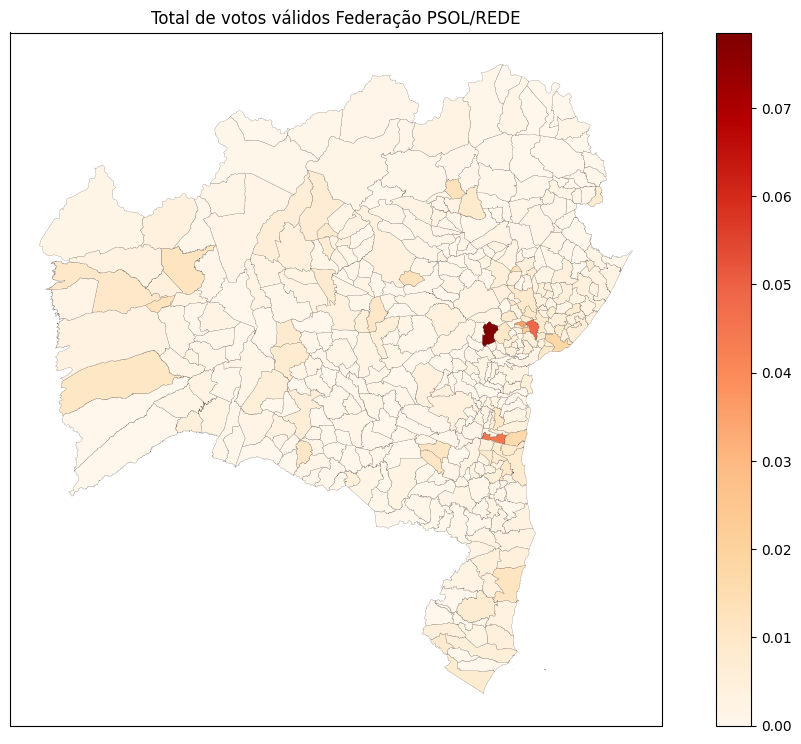

In [21]:
querry = """
SELECT mn.GEOMETRY, SUM(vp.QT_VOTOS_NOMINAIS_VALIDOS )*1.0/b.V0001 as VOTOS_NORMALIZADOS
FROM votos_partido vp,partido p, municipio mn, basico as b
where vp.DS_CARGO = 'DEPUTADO FEDERAL' and mn.CD_MUN = b.CD_MUN and mn.CD_MUN = vp.CD_MUN and vp.NR_PARTIDO = p.NR_PARTIDO and (p.SG_PARTIDO = 'PSOL' or p.SG_PARTIDO = 'REDE')
group by vp.CD_MUN 
"""

r = geopandas.read_postgis(querry,conn,geom_col='GEOMETRY')
r.plot(column = 'VOTOS_NORMALIZADOS',legend=True,cmap='OrRd',edgecolor='black',linewidth = 0.1,figsize=(14,9))
plt.xticks([])
plt.yticks([])
plt.title('Total de votos válidos Federação PSOL/REDE')
plt.show()

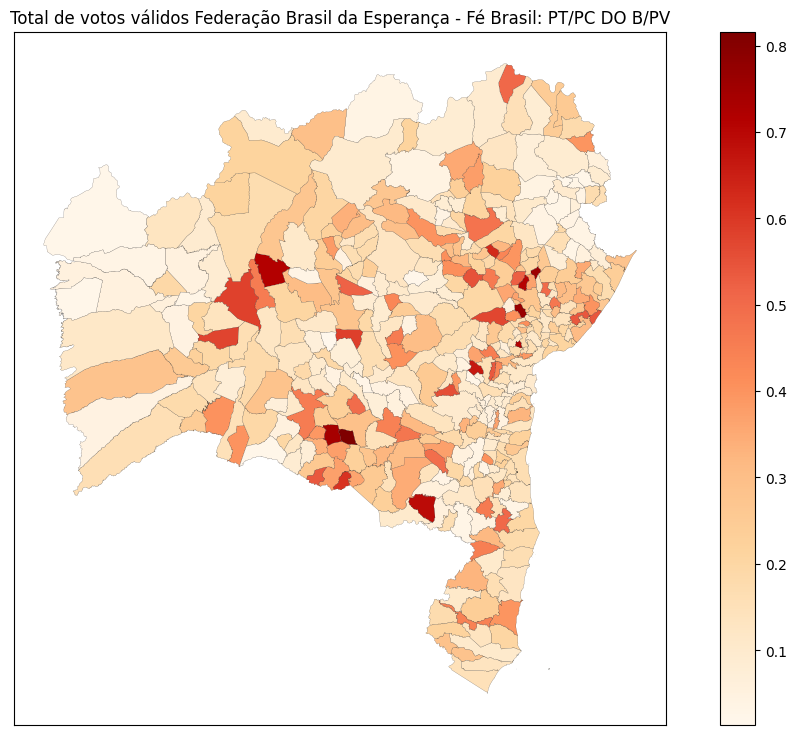

In [22]:
querry = """
SELECT mn.GEOMETRY, SUM(vp.QT_VOTOS_NOMINAIS_VALIDOS )*1.0/b.V0001 as VOTOS_NORMALIZADOS
FROM votos_partido vp,partido p, municipio mn, basico as b
where vp.DS_CARGO = 'DEPUTADO FEDERAL' and mn.CD_MUN = b.CD_MUN and mn.CD_MUN = vp.CD_MUN and vp.NR_PARTIDO = p.NR_PARTIDO and (p.SG_PARTIDO = 'PT' or p.SG_PARTIDO = 'PC DO B' or p.SG_PARTIDO = 'PV')
group by vp.CD_MUN 
"""

r = geopandas.read_postgis(querry,conn,geom_col='GEOMETRY')
r.plot(column = 'VOTOS_NORMALIZADOS',legend=True,cmap='OrRd',edgecolor='black',linewidth = 0.1,figsize=(14,9))
plt.xticks([])
plt.yticks([])
plt.title('Total de votos válidos Federação Brasil da Esperança - Fé Brasil: PT/PC DO B/PV')
plt.show()

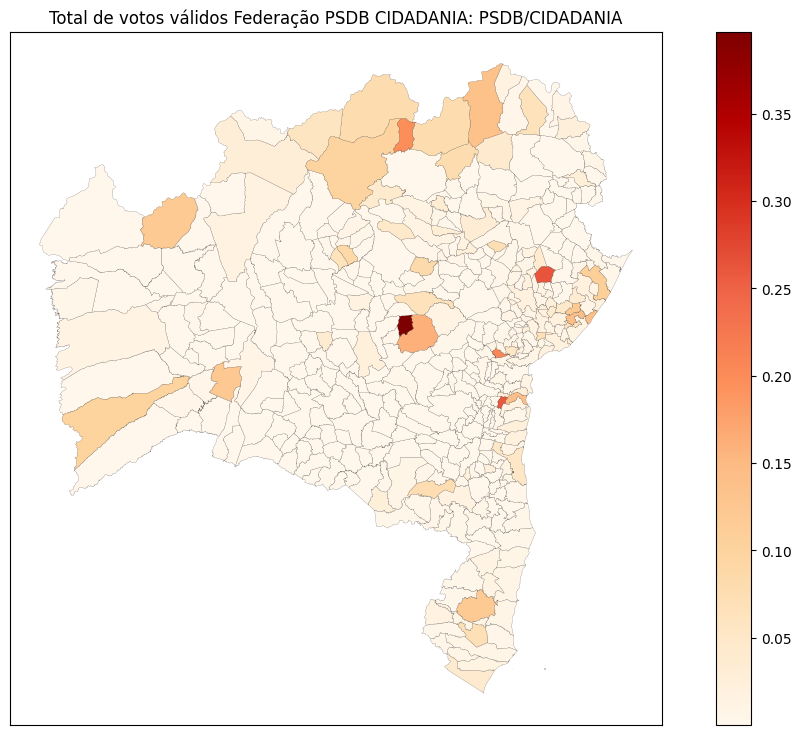

In [23]:
querry = """
SELECT mn.GEOMETRY, SUM(vp.QT_VOTOS_NOMINAIS_VALIDOS )*1.0/b.V0001 as VOTOS_NORMALIZADOS
FROM votos_partido vp,partido p, municipio mn, basico as b
where vp.DS_CARGO = 'DEPUTADO FEDERAL' and mn.CD_MUN = b.CD_MUN and mn.CD_MUN = vp.CD_MUN and vp.NR_PARTIDO = p.NR_PARTIDO and (p.SG_PARTIDO = 'PSDB' or p.SG_PARTIDO = 'CIDADANIA')
group by vp.CD_MUN 
"""

r = geopandas.read_postgis(querry,conn,geom_col='GEOMETRY')
r.plot(column = 'VOTOS_NORMALIZADOS',legend=True,cmap='OrRd',edgecolor='black',linewidth = 0.1,figsize=(14,9))
plt.xticks([])
plt.yticks([])
plt.title('Total de votos válidos Federação PSDB CIDADANIA: PSDB/CIDADANIA')
plt.show()

# Conclusão

Ao comparar as imagens que apresentam as ditribuições de votos para deputados federais das três coligações nos municípios da Bahia é possível perceber a dominância dos votos em grande parte do território pela coligação Federação Brasil da Esperança - Fé Brasil composta por PT, PC DO B e PV, que apresentam porcentagens significativas de votos em grande parte dos municípios do estado.

Já no caso da Federação PSDB/CIDADANIA existem sim cidades com porcentagem de votos significativos, mas são, em geral, casos mais isolados que não apresentam nenhum tipo de concenrtração que leve a entender que há uma região onde essa coligação tenha mais força.

Por fim, para a Federação PSOL/REDE é possível notar uma maior distribuição de seus votos ao longo das cidades mas com valores baixos de porcentagem que demonstram pouco impacto da coligação na eleição para deputados federais, dado que nas cidades com as maiores porcentagens para a coligação a quantidade de votos não chega à 10% dos votos válidos do município.

Portanto, a coligação que se demonstrou mais impactante em todo estado como um todo na eleição para deputado federal foi a Federação Brasil da Esperança - Fé Brasil, com porcetagens de votos chegando a 80% em algumas regiões do estado.